### Imports

In [1]:
from scapy.all import *
import pandas as pd
import numpy as np
import binascii # Binary to Ascii 
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

## Exploratory Data Analysis

### 1. Clean Packets

In [2]:
# reading pcap files
# clean_packets = rdpcap('./data/2-4-2019-GA-pcap.pcap')
clean_packets = rdpcap('./data/kaldis-2-27-19.pcapng')

In [3]:
# prints the clean packet counts
print('Clean Packets count    :', len(clean_packets))
print('Clean IP packets count :', len(clean_packets[IP]))
print('Clean TCP packets count:', len(clean_packets[TCP]))
print('Clean UDP packets count:', len(clean_packets[UDP]))
print('Clean DNS packets count:', len(clean_packets[DNS]))

Clean Packets count    : 11022
Clean IP packets count : 4676
Clean TCP packets count: 8886
Clean UDP packets count: 1542
Clean DNS packets count: 638


In [4]:
# shows summary for first packet
clean_packets[0].show()

###[ Ethernet ]### 
  dst       = 33:33:00:00:00:0c
  src       = f0:d5:bf:b6:64:f3
  type      = 0x86dd
###[ IPv6 ]### 
     version   = 6
     tc        = 0
     fl        = 8383
     plen      = 664
     nh        = UDP
     hlim      = 1
     src       = fe80::916a:42ca:7f6b:4def
     dst       = ff02::c
###[ UDP ]### 
        sport     = 52395
        dport     = upnp_discovery
        len       = 664
        chksum    = 0xddcb
###[ Raw ]### 
           load      = '<?xml version="1.0" encoding="utf-8"?><soap:Envelope xmlns:soap="http://www.w3.org/2003/05/soap-envelope" xmlns:wsa="http://schemas.xmlsoap.org/ws/2004/08/addressing" xmlns:wsd="http://schemas.xmlsoap.org/ws/2005/04/discovery"><soap:Header><wsa:To>urn:schemas-xmlsoap-org:ws:2005:04:discovery</wsa:To><wsa:Action>http://schemas.xmlsoap.org/ws/2005/04/discovery/Resolve</wsa:Action><wsa:MessageID>urn:uuid:9f45c784-15fe-439a-a26d-69614d3343b1</wsa:MessageID></soap:Header><soap:Body><wsd:Resolve><wsa:EndpointReference><wsa:A

In [5]:
# prints all details for first packet
clean_packets[Raw][0:5].show()

0000 Ether / IPv6 / UDP fe80::916a:42ca:7f6b:4def:52395 > ff02::c:upnp_discovery / Raw
0001 Ether / IP / UDP 169.254.254.57:netbios_ns > 169.254.255.255:netbios_ns / NBNSQueryRequest / Raw
0002 Ether / IP / UDP 192.168.1.139:52394 > 239.255.255.250:upnp_discovery / Raw
0003 Ether / IP / UDP 192.168.1.139:52393 > 239.255.255.250:ssdp / Raw
0004 Ether / IP / UDP 192.168.1.196:49153 > 192.168.1.255:49184 / Raw


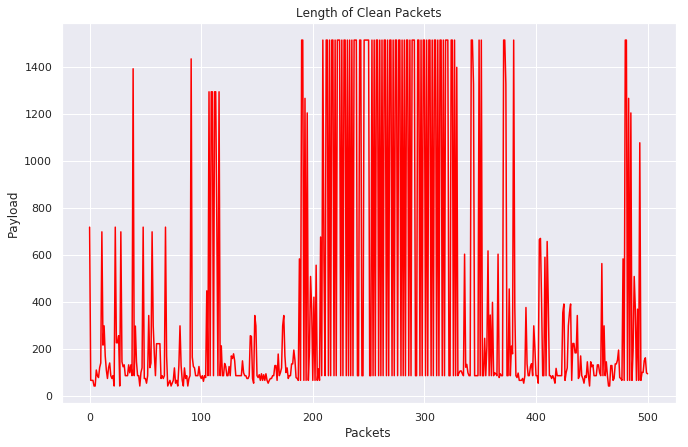

In [6]:
# plotting Size of data packets
plt.figure(figsize=(11, 7))
plt.title('Length of Clean Packets')
plt.xlabel('Packets')
plt.ylabel('Payload')
clean_packets[0:501].plot(lambda x:len(x),color='red');

### 2. Infected Packets

In [10]:
# load 2 infected pcap files
# infected_packets = rdpcap('./data/2019-01-30-Trickbot-infection-traffic.pcap')
infected_packets_2 = rdpcap('./data/2019-01-21-Emotet-infection-with-Gootkit.pcap')

In [7]:
# adds two pcap files together
infected_packets = infected_packets + infected_packets_2

In [11]:
# prints infected packet count
print('Infected packets count    :',len(infected_packets))
print('Infected IP packets count :',len(infected_packets[IP]))
print('Infected TCP packets count:',len(infected_packets[TCP]))
print('Infected UDP packets count:',len(infected_packets[UDP]))
print('Infected DNS packets count:',len(infected_packets[DNS]))

Infected packets count    : 20913
Infected IP packets count : 20913
Infected TCP packets count: 20889
Infected UDP packets count: 24
Infected DNS packets count: 768


In [12]:
# prints the summary of first packet
infected_packets[0].summary()

'Ether / IP / UDP / DNS Qry "b\'www.forma-31.ru.\'" '

In [13]:
# shows the entire first packets information
infected_packets[0:10][Raw].show()

0000 Ether / IP / TCP 10.1.21.101:49158 > 77.222.63.27:http PA / Raw
0001 Ether / IP / TCP 77.222.63.27:http > 10.1.21.101:49158 A / Raw
0002 Ether / IP / TCP 77.222.63.27:http > 10.1.21.101:49158 A / Raw
0003 Ether / IP / TCP 77.222.63.27:http > 10.1.21.101:49158 A / Raw


In [38]:
infected_packets[0].show()

###[ Ethernet ]### 
  dst       = 20:e5:2a:b6:93:f1
  src       = 00:08:02:1c:47:ae
  type      = 0x800
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 61
     id        = 59
     flags     = 
     frag      = 0
     ttl       = 128
     proto     = udp
     chksum    = 0xa64e
     src       = 10.1.21.101
     dst       = 10.1.21.1
     \options   \
###[ UDP ]### 
        sport     = 61089
        dport     = domain
        len       = 41
        chksum    = 0xbe1e
###[ DNS ]### 
           id        = 35499
           qr        = 0
           opcode    = QUERY
           aa        = 0
           tc        = 0
           rd        = 1
           ra        = 0
           z         = 0
           ad        = 0
           cd        = 0
           rcode     = ok
           qdcount   = 1
           ancount   = 0
           nscount   = 0
           arcount   = 0
           \qd        \
            |###[ DNS Question Record ]### 
            |  qname 

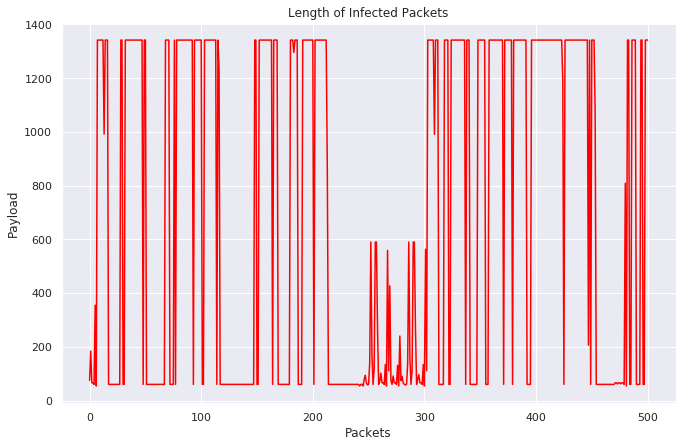

In [39]:
# plotting Size of data packets
plt.figure(figsize=(11, 7))
plt.title('Length of Infected Packets')
plt.xlabel('Packets')
plt.ylabel('Payload')
infected_packets[0:501].plot(lambda x:len(x),color='red');

### Extract data from Clean Packets to Dataframe

In [12]:

# dns_fields  = [field.name for field in DNS().fields_desc  ]
# all_fields = []
# for packet in packets[DNS][0:10]:
#     fields = []
#     for field in dns_fields:
#         if field == 'options':
#             fields.append(len(packet[DNS].fields[field]))
#         else: 
#             fields.append(packet[DNS].fields[field])
#     all_fields.append(fields)

# all_fields

In [40]:
def packets_to_dataframe(packets):
    
    # empty list for all field values
    all_field_values = []

    # Collect field names from IP/TCP/UDP (These will be columns in DF)
    ip_fields    = [field.name for field in IP().fields_desc   ]
    tcp_fields   = [field.name for field in TCP().fields_desc  ]
    udp_fields   = [field.name for field in UDP().fields_desc  ]

    # field names of each field (column names for dataframe)
    df_fields = ip_fields + ['time'] + tcp_fields + ['payload','payload_raw','payload_hex'] 

    # iterate through each packet with IP header
    for packet in packets[IP]:
        # create empty field array for each row of dataframe
        field_values = []

        # add all IP fields to dataframe
        for field in ip_fields:
            if field == 'options':
                # gets number of options defined in IP Header
                field_values.append(len(packet[IP].fields[field]))
            else:
                field_values.append(packet[IP].fields[field])

        # append time for each row 
        field_values.append(packet.time)

        # gets type of IP payload
        layer_type = type(packet[IP].payload)
    #     dnsrr_layer_type = type(packet[DNSRR].payload)

        # iterates through each field in TCP fields
        for field in tcp_fields:
            try:
                if field == 'options':
                    # gets length of payload packet type
                    field_values.append(len(packet[layer_type].fields[field]))
                else:
                    # gets options defined in layer type header
                    field_values.append(packet[layer_type].fields[field])
            except:
                field_values.append(None)

        try:
            # append each packets layer type payload
            field_values.append(len(packet[layer_type].payload))
            field_values.append(packet[layer_type].payload.original)
            field_values.append(binascii.hexlify(packet[layer_type].payload.original))
        except:
            pass


        # appends field values list
        all_field_values.append(field_values)
        
        
    return pd.DataFrame(data=all_field_values, columns=df_fields)

In [41]:
# saves dataframe of clean packets
clean_packets_df = packets_to_dataframe(clean_packets)

# sets target column (0 = clean)
clean_packets_df['target'] = 0

#### Save Dataframe to CSV file

In [15]:
# clean_packets.to_csv('./data/clean_packets.csv')

#### Open clean packets CSV file

In [16]:
# clean_packets_df = pd.read_csv('./data/clean_packets.csv')

### Exploratory Data Analysis - Clean Packets

In [42]:
clean_packets_df.iloc[0]

version                                                        4
ihl                                                            5
tos                                                            0
len                                                          202
id                                                         47436
flags                                                           
frag                                                           0
ttl                                                            1
proto                                                         17
chksum                                                      2615
src                                                10.64.251.101
dst                                              239.255.255.250
options                                                        0
time                                                 1.55076e+09
sport                                                      49298
dport                    

In [43]:
clean_packets_df.shape

(50687, 29)

In [44]:
clean_packets_df.columns

Index(['version', 'ihl', 'tos', 'len', 'id', 'flags', 'frag', 'ttl', 'proto',
       'chksum', 'src', 'dst', 'options', 'time', 'sport', 'dport', 'seq',
       'ack', 'dataofs', 'reserved', 'flags', 'window', 'chksum', 'urgptr',
       'options', 'payload', 'payload_raw', 'payload_hex', 'target'],
      dtype='object')

In [45]:
clean_packets_df.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex,target
0,4,5,0,202,47436,,0,1,17,2615,...,NaN,None,NaN,33203,NaN,NaN,174,b'M-SEARCH * HTTP/1.1\r\nHOST: 239.255.255.250...,b'4d2d534541524348202a20485454502f312e310d0a48...,0
1,4,5,0,40,52691,,0,64,6,21967,...,0.0,A,2048.0,17643,0.0,NaN,0,b'',b'',0
2,4,5,32,52,12071,,0,120,6,48207,...,0.0,A,248.0,2916,0.0,3.0,0,b'',b'',0
3,4,5,0,82,0,DF,0,64,6,17089,...,0.0,PA,2048.0,52783,0.0,3.0,30,b'\x17\x03\x03\x00\x19\x00\x00\x00\x00\x00\x00...,b'17030300190000000000000035b3a81bb57ac772dfa3...,0
4,4,5,0,40,12996,,0,64,6,36767,...,0.0,A,2048.0,19080,0.0,NaN,0,b'',b'',0


In [46]:
clean_packets_df.isnull().sum()

version           0
ihl               0
tos               0
len               0
id                0
flags             0
frag              0
ttl               0
proto             0
chksum            0
src               0
dst               0
options           0
time              0
sport           488
dport           488
seq            1145
ack            1553
dataofs        1553
reserved       1473
flags          1553
window         1553
chksum            0
urgptr         1553
options        4276
payload           0
payload_raw       0
payload_hex       0
target            0
dtype: int64

In [47]:
# dataframe with source and destination address, source and destionation port
clean_packets_df[['src','dst','sport','dport']].head()

,src,dst,sport,dport
0,10.64.251.101,239.255.255.250,49298.0,1900.0
1,10.64.251.101,172.217.164.174,58921.0,443.0
2,172.217.164.174,10.64.251.101,443.0,58921.0
3,10.64.251.101,173.194.68.125,58381.0,5222.0
4,10.64.251.101,172.217.5.238,58400.0,443.0


In [48]:
clean_packets_df['src'].describe()[1:4]

unique              283
top       10.64.251.101
freq              22128
Name: src, dtype: object

In [49]:
clean_packets_df['dst'].describe()[1:4]

unique              270
top       10.64.251.101
freq              28559
Name: dst, dtype: object

In [73]:
clean_packets_df['sport'] =clean_packets_df['sport'][:].astype(str)

In [74]:
type(clean_packets_df['sport'][0])

str

In [75]:
#  converts dtype to integer
# clean_packets_df['sport'] = clean_packets_df['sport'].fillna(999.9).astype(int)

# pd.options.display.float_format = '{:,.0f}'.format

clean_packets_df['sport'].describe()[1:4]


unique      879
top       443.0
freq      24138
Name: sport, dtype: object

In [76]:
clean_packets_df['dport'] = clean_packets_df['dport'][:].astype(str)

In [77]:
# converted dtype to integer
# clean_packets['dport'] = clean_packets['dport'].fillna(999.0).astype(str)

clean_packets_df['dport'].describe()[1:4]

unique      952
top       443.0
freq      19896
Name: dport, dtype: object

In [78]:
# Top Source Adddress
print("# Top Source Address")
print(clean_packets_df['src'].describe(),'\n\n')

# Top Destination Address
print("# Top Destination Address")
print(clean_packets_df['dst'].describe(),"\n\n")

frequent_address = clean_packets_df['src'].describe()['top']

# who is the top address speaking to
print("# Who is Top Address Speaking to?")
print(clean_packets_df[clean_packets_df['src'] == frequent_address]['dst'].unique(),"\n\n")

# who is the top address speaking to (destination ports)
print("# Who is the top address speaking to (Destination Ports)")
print(clean_packets_df[clean_packets_df['src'] == frequent_address]['dport'].unique(),"\n\n")

# who is the top address speaking to (source ports)
print("# Who is the top address speaking to (Source Ports)")
print(clean_packets_df[clean_packets_df['src'] == frequent_address]['sport'].unique(),"\n\n")

# Top Source Address
count             50687
unique              283
top       10.64.251.101
freq              22128
Name: src, dtype: object 


# Top Destination Address
count             50687
unique              270
top       10.64.251.101
freq              28559
Name: dst, dtype: object 


# Who is Top Address Speaking to?
['239.255.255.250' '172.217.164.174' '173.194.68.125' '172.217.5.238'
 '10.128.128.128' '192.241.168.226' '172.217.5.234' '224.0.0.251'
 '74.125.192.189' '172.217.164.142' '34.237.73.95' '100.26.125.169'
 '172.217.7.163' '17.253.24.125' '17.253.20.125' '17.253.14.253'
 '172.217.164.132' '52.86.209.36' '23.46.52.32' '23.62.27.98'
 '45.57.63.152' '172.217.164.163' '34.235.231.24' '52.5.154.245'
 '172.217.7.226' '172.217.7.230' '172.217.7.162' '45.57.62.158'
 '23.96.207.25' '31.13.66.35' '172.217.11.48' '172.217.15.74'
 '172.217.15.104' '172.217.7.238' '31.13.71.7' '172.217.8.3'
 '99.84.104.57' '99.84.216.67' '99.84.104.112' '35.170.0.145'
 '35.241.24.90' '23.219.22

### Extract data from Infected Packets into Dataframe

In [79]:
# saves infected packets to dataframe using function
infected_packets_df = packets_to_dataframe(infected_packets)


# sets target column to 1 (infected)
infected_packets_df['target'] = 1

### Exploratory Data Analysis - Infected Packets

In [80]:
# shows the first infected packets information
infected_packets_df.iloc[0]

version                                                        4
ihl                                                            5
tos                                                            0
len                                                           61
id                                                            59
flags                                                           
frag                                                           0
ttl                                                          128
proto                                                         17
chksum                                                     42574
src                                                  10.1.21.101
dst                                                    10.1.21.1
options                                                        0
time                                               1,548,086,634
sport                                                      61089
dport                    

In [81]:
infected_packets_df.shape

(20913, 29)

In [82]:
infected_packets_df.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex,target
0,4,5,0,61,59,,0,128,17,42574,...,nan,None,nan,48670,nan,nan,33,b'\x8a\xab\x01\x00\x00\x01\x00\x00\x00\x00\x00...,b'8aab010000010000000000000377777708666f726d61...,1
1,4,5,0,170,14253,,0,128,17,28271,...,nan,None,nan,55835,nan,nan,142,b'\x8a\xab\x81\x80\x00\x01\x00\x01\x00\x04\x00...,b'8aab818000010001000400000377777708666f726d61...,1
2,4,5,0,52,61,DF,0,128,6,8977,...,0,S,"8,192",13742,0,6,0,b'',b'',1
3,4,5,0,52,0,DF,0,54,6,27982,...,0,SA,"29,200",60887,0,6,0,b'',b'',1
4,4,5,0,40,64,DF,0,128,6,8986,...,0,A,256,40718,0,nan,6,b'\x00\x00\x00\x00\x00\x00',b'000000000000',1


In [83]:
# checks for null values in each column
infected_packets_df.isnull().sum()

version           0
ihl               0
tos               0
len               0
id                0
flags             0
frag              0
ttl               0
proto             0
chksum            0
src               0
dst               0
options           0
time              0
sport             0
dport             0
seq              24
ack              24
dataofs          24
reserved         24
flags            24
window           24
chksum            0
urgptr           24
options        4881
payload           6
payload_raw       6
payload_hex       6
target            0
dtype: int64

In [84]:
# grabs source, destination, source port and destination port columns
infected_packets_df[['src','dst','sport','dport']].head()

,src,dst,sport,dport
0,10.1.21.101,10.1.21.1,61089,53
1,10.1.21.1,10.1.21.101,53,61089
2,10.1.21.101,77.222.63.27,49158,80
3,77.222.63.27,10.1.21.101,80,49158
4,10.1.21.101,77.222.63.27,49158,80


In [85]:
infected_packets_df['src'].describe()[1:4]

unique             10
top       10.1.21.101
freq            10454
Name: src, dtype: object

In [86]:
infected_packets_df['dst'].describe()[1:4]

unique             11
top       10.1.21.101
freq            10459
Name: dst, dtype: object

In [87]:
infected_packets_df['sport'].describe()[1:4]

mean   24,788
std    24,392
min        53
Name: sport, dtype: float64

In [88]:
infected_packets_df['dport'].describe()[1:4]

mean   24,801
std    24,391
min        53
Name: dport, dtype: float64

In [89]:
# top source adddress
print("# Top Source Address")
print(infected_packets_df['src'].describe(),'\n\n')

# top destination address
print("# Top Destination Address")
print(infected_packets_df['dst'].describe(),"\n\n")

frequent_address = infected_packets_df['src'].describe()['top']

# who is the top address speaking to
print("# Who is Top Address Speaking to?")
print(infected_packets_df[infected_packets_df['src'] == frequent_address]['dst'].unique(),"\n\n")

# who is the top address speaking to (desticantion ports)
print("# Who is the top address speaking to (Destination Ports)")
print(infected_packets_df[infected_packets_df['src'] == frequent_address]['dport'].unique(),"\n\n")

# who is the top address speaking to (source ports)
print("# Who is the top address speaking to (Source Ports)")
print(infected_packets_df[infected_packets_df['src'] == frequent_address]['sport'].unique(),"\n\n")

# Top Source Address
count           20913
unique             10
top       10.1.21.101
freq            10454
Name: src, dtype: object 


# Top Destination Address
count           20913
unique             11
top       10.1.21.101
freq            10459
Name: dst, dtype: object 


# Who is Top Address Speaking to?
['10.1.21.1' '77.222.63.27' '213.186.33.18' '134.0.14.83' '83.217.75.51'
 '5.61.248.185' '182.176.106.43' '100.42.20.148' '178.162.132.90'
 '51.15.37.44'] 


# Who is the top address speaking to (Destination Ports)
[ 53  80 995 443] 


# Who is the top address speaking to (Source Ports)
[61089 49158 62886 49160 51084 49161 56596 49162 58438 49163 63132 49164
 49165 49166 49167 63157 49168 49170 49171 49172 49173 65176 49174 49175
 50991 49176 49177 62885 49178 49179 49433 49180 49182 64864 49183 49184
 49185 49186 49187 49188 49189 49190 49191 49192 49193] 




### Combining Clean and Infected Dataframes

In [90]:
all_packets_df = pd.concat([clean_packets_df, infected_packets_df], axis=0)

all_packets_df.head()

,version,ihl,tos,len,id,flags,frag,ttl,proto,chksum,...,reserved,flags,window,chksum,urgptr,options,payload,payload_raw,payload_hex,target
0,4,5,0,202,47436,,0,1,17,2615,...,nan,None,nan,33203,nan,nan,174,b'M-SEARCH * HTTP/1.1\r\nHOST: 239.255.255.250...,b'4d2d534541524348202a20485454502f312e310d0a48...,0
1,4,5,0,40,52691,,0,64,6,21967,...,0,A,"2,048",17643,0,nan,0,b'',b'',0
2,4,5,32,52,12071,,0,120,6,48207,...,0,A,248,2916,0,3,0,b'',b'',0
3,4,5,0,82,0,DF,0,64,6,17089,...,0,PA,"2,048",52783,0,3,30,b'\x17\x03\x03\x00\x19\x00\x00\x00\x00\x00\x00...,b'17030300190000000000000035b3a81bb57ac772dfa3...,0
4,4,5,0,40,12996,,0,64,6,36767,...,0,A,"2,048",19080,0,nan,0,b'',b'',0


In [91]:
# reset index
all_packets_df = all_packets_df.reset_index()

##### Save Combined Dataframe to CSV File

In [ ]:
# all_packets_df.to_csv('all_packets_df.csv')

##### Open Combined CSV to Dataframe

In [6]:
all_packets_df = pd.DataFrame('./data/all_packets_df.csv')

ValueError: DataFrame constructor not properly called!

### Exploratory Data Analysis - All Packets

In [92]:
# show shape of all packets
all_packets_df.shape

(71600, 30)

In [93]:
# there are 2 columns named 'flags'
all_packets_df.columns

Index(['index', 'version', 'ihl', 'tos', 'len', 'id', 'flags', 'frag', 'ttl',
       'proto', 'chksum', 'src', 'dst', 'options', 'time', 'sport', 'dport',
       'seq', 'ack', 'dataofs', 'reserved', 'flags', 'window', 'chksum',
       'urgptr', 'options', 'payload', 'payload_raw', 'payload_hex', 'target'],
      dtype='object')

In [94]:
# shows that it calls two columns
print('Dataframe Shape:',all_packets_df['flags'].shape)

all_packets_df[['flags']].tail()

Dataframe Shape: (71600, 2)


,flags,flags
71595,DF,A
71596,DF,A
71597,DF,A
71598,DF,A
71599,DF,RA


In [95]:
# renames 2nd flags columns to flags.1
all_packets_df.columns = ['index', 'version', 'ihl', 'tos', 'len', 'id', 'flags', 'frag', 'ttl',
       'proto', 'chksum', 'src', 'dst', 'options', 'time', 'sport', 'dport',
       'seq', 'ack', 'dataofs', 'reserved', 'flags.1', 'window', 'chksum',
       'urgptr', 'options', 'payload', 'payload_raw', 'payload_hex', 'target']

In [96]:
flags_dummy = pd.get_dummies(all_packets_df['flags.1'])
src_dummy = pd.get_dummies(all_packets_df['src'])
dst_dummy = pd.get_dummies(all_packets_df['dst'])

In [97]:
print('Flags Dummy =',flags_dummy.shape[1], 'Columns')
print('All Packets =',all_packets_df.shape[1], 'Columns')

Flags Dummy = 10 Columns
All Packets = 30 Columns


In [98]:
print('Flags Dummy =',src_dummy.shape[1], 'Columns')
print('All Packets =',all_packets_df.shape[1], 'Columns')

Flags Dummy = 293 Columns
All Packets = 30 Columns


In [99]:
print('Flags Dummy =',dst_dummy.shape[1], 'Columns')
print('All Packets =',all_packets_df.shape[1], 'Columns')

Flags Dummy = 281 Columns
All Packets = 30 Columns


In [100]:
# merging the full dataframe with dummies dataframe
all_packets_df = pd.merge(all_packets_df, flags_dummy, how='inner', on=all_packets_df['index'])

all_packets_df.drop('key_0', axis=1, inplace=True)

In [ ]:
# all_packets_df.drop('level_0', axis=1, inplace=True)
# all_packets_df.reset_index(inplace=True)

In [ ]:
# resets index
# all_packets_df.reset_index()

# drops unecessary indexes
# all_packets_df.drop(['key_0',], axis=1, inplace=True)

In [ ]:
# all_packets_df[['index']] = all_packets_df[['level_0']]

In [101]:
all_packets_df = pd.merge(all_packets_df, src_dummy, how='inner',left_index=True, right_index=True)

# drop key column (unecessary index)
# all_packets_df.drop('key_0', axis=1, inplace=True)

In [102]:
all_packets_df.head()

,index,version,ihl,tos,len,id,flags,frag,ttl,proto,...,99.84.104.57,99.84.181.113,99.84.181.15,99.84.181.41,99.84.181.9,99.84.185.154,99.84.216.106,99.84.216.30,99.84.216.67,99.84.216.96
0,0,4,5,0,202,47436,,0,1,17,...,0,0,0,0,0,0,0,0,0,0
1,0,4,5,0,202,47436,,0,1,17,...,0,0,0,0,0,0,0,0,0,0
2,0,4,5,0,61,59,,0,128,17,...,0,0,0,0,0,0,0,0,0,0
3,0,4,5,0,61,59,,0,128,17,...,0,0,0,0,0,0,0,0,0,0
4,1,4,5,0,40,52691,,0,64,6,...,0,0,0,0,0,0,0,0,0,0


In [103]:
all_packets_df = pd.merge(all_packets_df, dst_dummy, how='inner', on=all_packets_df['index'])

In [104]:
# drop key and level columns (unecessary index)
all_packets_df.drop('key_0', axis=1, inplace=True)

In [105]:
all_packets_df.reset_index(inplace=True)

In [106]:
all_packets_df[2:7]

,level_0,index,version,ihl,tos,len,id,flags,frag,ttl,...,99.84.104.57_y,99.84.181.113_y,99.84.181.15_y,99.84.181.41_y,99.84.181.9_y,99.84.185.154_y,99.84.216.106_y,99.84.216.30_y,99.84.216.67_y,99.84.216.96_y
2,2,0,4,5,0,202,47436,,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,0,4,5,0,202,47436,,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0,4,5,0,202,47436,,0,1,...,0,0,0,0,0,0,0,0,0,0
5,5,0,4,5,0,202,47436,,0,1,...,0,0,0,0,0,0,0,0,0,0
6,6,0,4,5,0,202,47436,,0,1,...,0,0,0,0,0,0,0,0,0,0


In [107]:
# check for null values
all_packets_df.isnull().sum()

level_0                 0
index                   0
version                 0
ihl                     0
tos                     0
len                     0
id                      0
flags                   0
frag                    0
ttl                     0
proto                   0
chksum                  0
src                     0
dst                     0
options                 0
time                    0
sport                   0
dport                   0
seq                  2008
ack                  2008
dataofs              2008
reserved             2008
flags.1              2008
window               2008
chksum                  0
urgptr               2008
options             39376
payload                 8
payload_raw             8
payload_hex             8
                    ...  
66.117.28.86_y          0
68.70.205.1_y           0
69.147.92.11_y          0
72.163.10.10_y          0
72.163.10.15_y          0
72.21.91.29_y           0
72.251.236.55_y         0
74.115.50.11

In [108]:
all_packets_df['sport'].replace(np.nan, 999, inplace=True)
all_packets_df['dport'].replace(np.nan, 999, inplace=True)
all_packets_df['chksum'].replace(np.nan, 0, inplace=True)

In [109]:
all_packets_df.isnull().sum()

level_0                 0
index                   0
version                 0
ihl                     0
tos                     0
len                     0
id                      0
flags                   0
frag                    0
ttl                     0
proto                   0
chksum                  0
src                     0
dst                     0
options                 0
time                    0
sport                   0
dport                   0
seq                  2008
ack                  2008
dataofs              2008
reserved             2008
flags.1              2008
window               2008
chksum                  0
urgptr               2008
options             39376
payload                 8
payload_raw             8
payload_hex             8
                    ...  
66.117.28.86_y          0
68.70.205.1_y           0
69.147.92.11_y          0
72.163.10.10_y          0
72.163.10.15_y          0
72.21.91.29_y           0
72.251.236.55_y         0
74.115.50.11

In [110]:
all_packets_df.shape

(286400, 615)

In [111]:
clean_all_packets = all_packets_df.dropna(axis=1, inplace=False)

In [112]:
clean_all_packets.shape

(286400, 604)

#### Save Dataframe to CSV File

In [ ]:
# clean_all_packets.to_csv('clean_all_packets.csv')

### Plotting

In [64]:
df_full =  pd.read_csv('./data/df_full.csv')

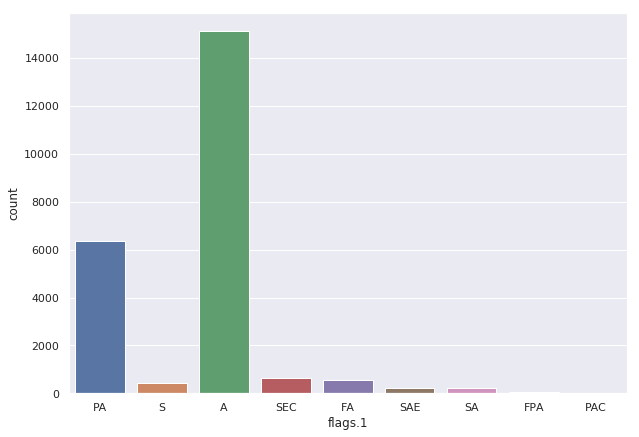

In [83]:
import seaborn as sns

# count plot for flags column
plt.figure(figsize=(10,7))
sns.countplot(df_full['flags.1'],label="Count")
plt.show()

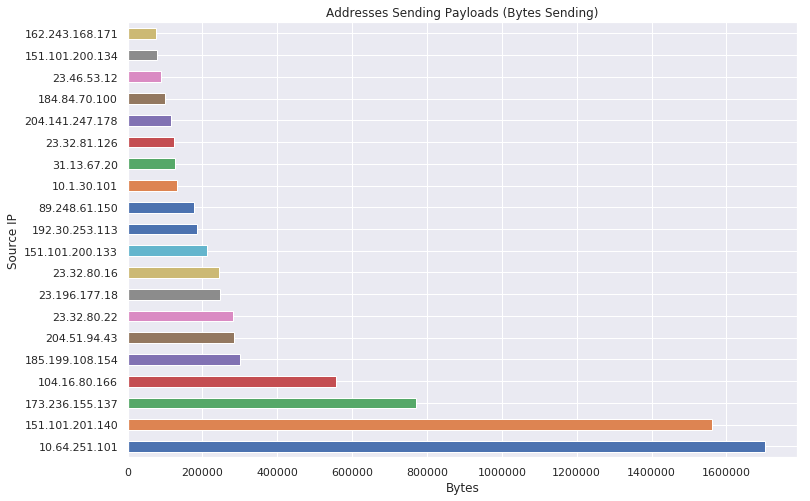

In [78]:
# group by source address and payload sum
source_addresses = df_full.groupby('src')['payload'].sum().sort_values(ascending=False).head(20)

source_addresses.plot(kind='barh',title='Addresses Sending Payloads (Bytes Sending)',figsize=(12,8))
plt.xlabel('Bytes')
plt.ylabel('Source IP')
plt.show();

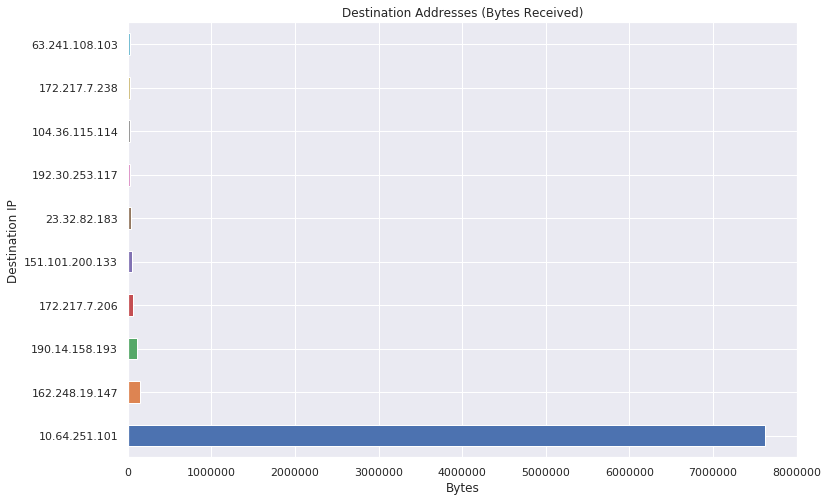

In [77]:
# Group by Destination Address and Payload Sum to 10

destination_addresses = df_full.groupby('dst')['payload'].sum().sort_values(ascending=False).head(10)
destination_addresses.plot(kind='barh', title='Destination Addresses (Bytes Received)',figsize=(12,8))
plt.xlabel('Bytes')
plt.ylabel('Destination IP');

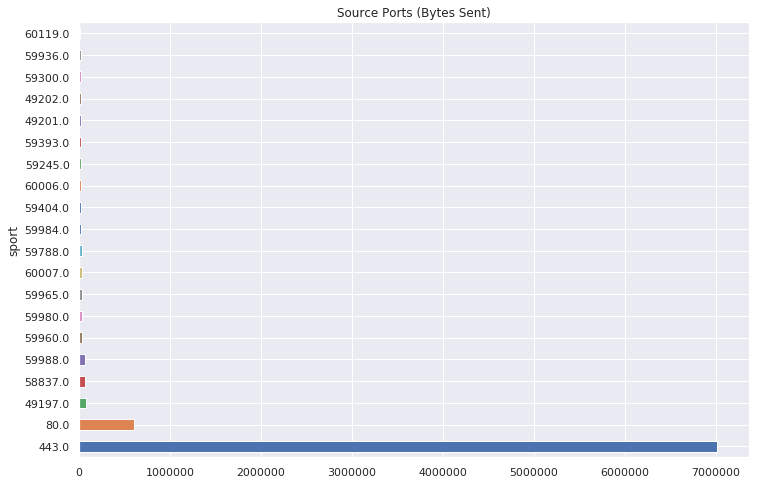

In [76]:
# Group by Source Port and Payload Sum top 10
source_payloads = df_full.groupby("sport")['payload'].sum().sort_values(ascending=False).head(20)
source_payloads.plot(kind='barh',title="Source Ports (Bytes Sent)",figsize=(12,8));

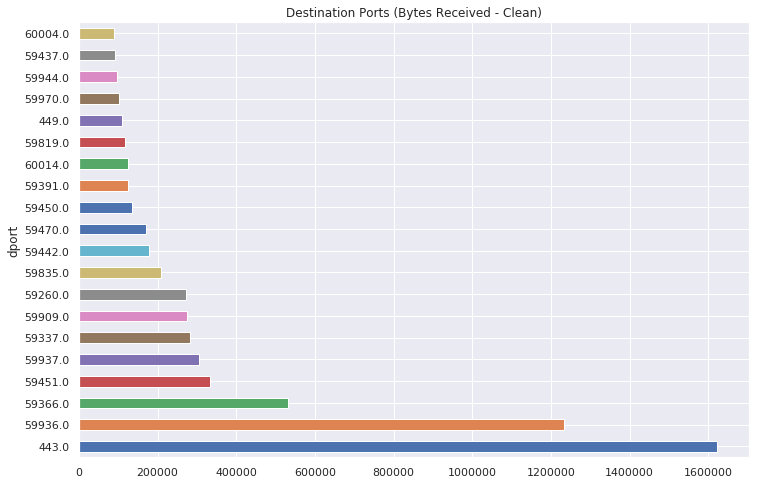

In [75]:
# Group by Destination Port and Payload Sum top 10
destination_payloads = df_full.groupby("dport")['payload'].sum().sort_values(ascending=False).head(20)
destination_payloads.plot(kind='barh',title="Destination Ports (Bytes Received - Clean)",figsize=(12,8));

In [51]:
df_infected = pd.read_csv('./data/infected_pcap.csv')

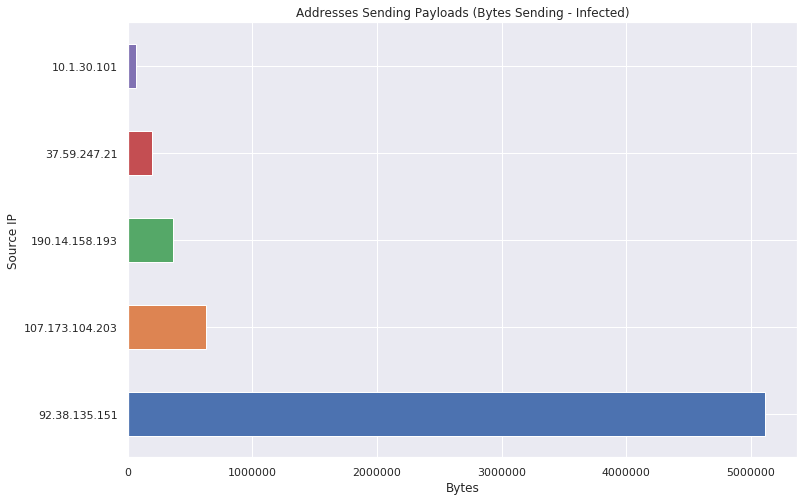

In [74]:
# group by source address and payload sum
source_addresses_inf = df_infected.groupby('src')['payload'].sum().sort_values(ascending=False).head()

source_addresses_inf.plot(kind='barh',title='Addresses Sending Payloads (Bytes Sending - Infected)',figsize=(12,8))
plt.xlabel('Bytes')
plt.ylabel('Source IP');

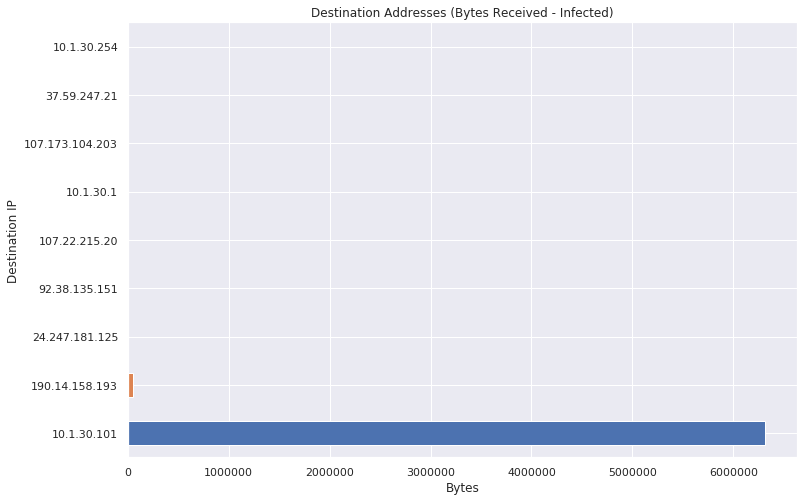

In [73]:
# Group by Destination Address and Payload Sum to 10

destination_addresses = df_infected.groupby('dst')['payload'].sum().sort_values(ascending=False).head(10)
destination_addresses.plot(kind='barh', title='Destination Addresses (Bytes Received - Infected)',figsize=(12,8))
plt.xlabel('Bytes')
plt.ylabel('Destination IP');

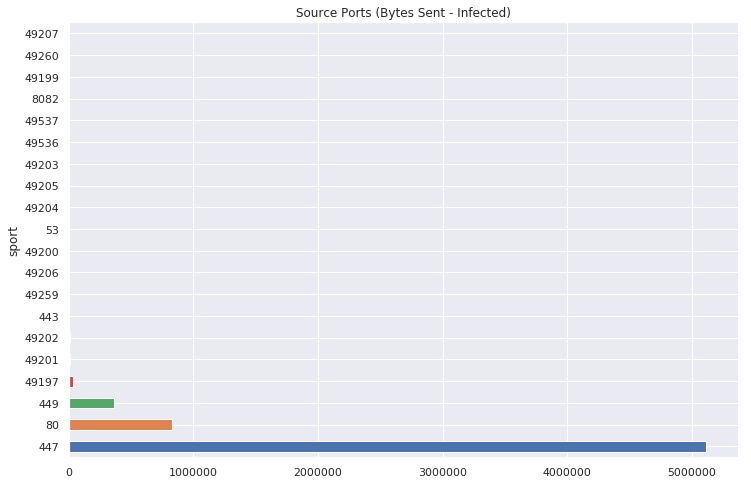

In [72]:
# Group by Source Port and Payload Sum top 10
source_payloads = df_infected.groupby("sport")['payload'].sum().sort_values(ascending=False).head(20)
source_payloads.plot(kind='barh',title="Source Ports (Bytes Sent - Infected)",figsize=(12,8));

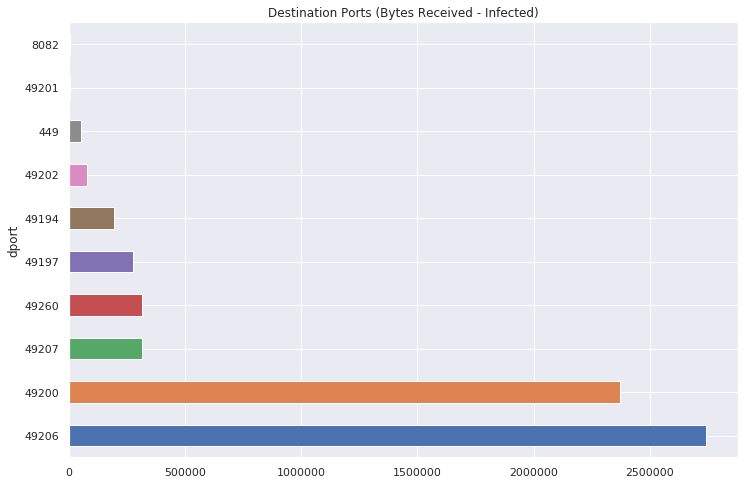

In [71]:
# Group by Destination Port and Payload Sum top 10

destination_payloads_inf = df_infected.groupby("dport")['payload'].sum().sort_values(ascending=False).head(10)
destination_payloads_inf.plot(kind='barh',title="Destination Ports (Bytes Received - Infected)",figsize=(12,8));


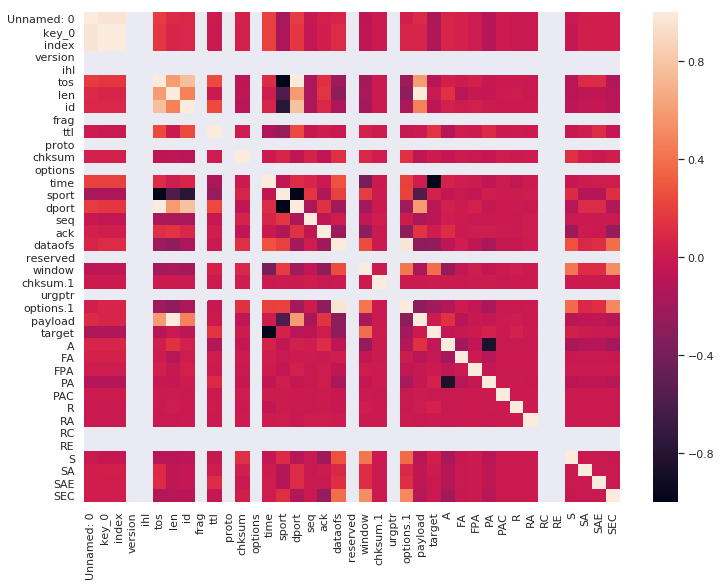

In [67]:
plt.figure(figsize=(12,9))
sns.heatmap(df_full.corr())